<table>
    <tr>
        <td><img src="https://raw.githubusercontent.com/Fabian830348/Bases_Datos/refs/heads/master/Logo_EICT_horizontal_ESPANOL%20(1).png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue"> Conceptos Machine Learning </p> Clasificación   </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Machine Learning </p></tp>
            <tp><p style="font-size:115%;text-align:center">A. Supervisado</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

# <FONT SIZE=5 COLOR="purple"> Objetivos de la Sesión </FONT>

En esta sección revisaremos:

- Modelos de clasificación

- Curva ROC

- Optimización de Hiperparámetros

Iniciaremos cargando las librerías

In [1]:
# Manipulación de data.frames
import pandas as pd
import numpy as np

# Librerías para Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Librerías para datos de entrenamiento y prueba
from sklearn.model_selection    import train_test_split

# Para preprocesamiento
from sklearn.preprocessing      import StandardScaler, MinMaxScaler
from sklearn.preprocessing      import LabelEncoder, OneHotEncoder
from sklearn.compose            import ColumnTransformer
from sklearn.pipeline           import Pipeline

# Para modelos de clasificación
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.tree               import DecisionTreeClassifier
from sklearn.svm                import SVC
from sklearn.ensemble           import RandomForestClassifier

# Métricas de evaluación
from sklearn.metrics            import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics           import specificity_score

# para hacer la curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Optimización de hiperparámetros
from sklearn.model_selection    import GridSearchCV

import time

# Para ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

# <FONT SIZE=5 COLOR="purple"> 1. Ejemplo  Clasificación </FONT>

***Objetivo del ejercicio***. Aplicar el modelo de clasificación ***KNN-Reglog-Árboles-Red*** para determinar cuando se aprueba a un cliente una tarjeta de crédito o no, dependiendo de las otras variables.

***Contexto de los datos***

Este ejercicio se basa en un conjunto de datos que se publicó originalmente junto con la quinta edición del libro *Análisis Econométrico* de William Greene.

Este libro tiene datos de tarjetas de crédito que se componen de una variable objetivo que es de naturaleza binaria (1 si se aprueba la solicitud de tarjeta de crédito, 0 si no) y algunas variables independientes sobre la demografía y el historial crediticio de los titulares de tarjetas de crédito.

Los datos para este trabajo están en *kaggle* en la siguiente *url*.

https://www.kaggle.com/datasets/dansbecker/aer-credit-card-data?select=AER_credit_card_data.csv

Sin embargo, se anexan los datos como ***credict3*** y este trabajo se va a desarrollar con esta base.

```python
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/credit3.csv"
```

Cada fila representa una solicitud de tarjeta de crédito, cada columna contiene los atributos del solicitante:

- *tarjeta*: variable ficticia, 1 si se aprueba la solicitud de tarjeta de crédito, 0 si no

- *informes*: número de informes despectivos importantes.

- *edad*: Edad n años más doceavos de un año.

- *ingreso*: ingreso anual (dividido por 10,000).

- *participación*: relación entre el gasto mensual de la tarjeta de crédito y el ingreso anual.

- *gasto*: gasto medio mensual con tarjeta de crédito.

- *propietario*: 1 si es dueño de su casa, 0 si alquila.

- *selfemp*: 1 si es autónomo, 0 si no.

- *dependientes*: 1 + número de dependientes.

- *meses*: Meses viviendo en la dirección actual.

- *majorcards*: número de las principales tarjetas de crédito que se tienen.

- activo: Número de cuentas de crédito activas.

Según Greene (2003, p. 952) los dependientes equivalen a 1 + número de dependientes. Eso se describe arriba. Los autores del paquete “AER” en R creen que es el número de dependientes.

Algunas precisiones sobre las variables

- *Los informes promedio* (es decir, el número promedio de informes despectivos importantes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El ingreso promedio* (es decir, el ingreso anual promedio dividido por 10,000) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *La participación promedio* (es decir, la relación promedio entre el gasto mensual de la tarjeta de crédito y el ingreso anual) de los solicitantes que fueron aprobados es más alta que la de los solicitantes que no fueron aprobados.

- *El gasto promedio* (es decir, el gasto mensual promedio con tarjeta de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.

- *El promedio de dependientes*(es decir, el número promedio de dependientes) de los solicitantes que fueron aprobados es menor que el de los solicitantes que no fueron aprobados.

- *El promedio de tarjetas principales (es decir, el número promedio de las principales tarjetas de crédito) de los solicitantes que fueron aprobados es más alto que el de los solicitantes que no fueron aprobados.


## <FONT SIZE=4 COLOR="blue"> 1.1 Carga y exploración rápida de los datos</FONT>

In [2]:
# cargar los datos que están la dirección del github
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/datos_credito.csv"
credito = pd.read_csv(url, na_values=[" "])

In [3]:
# revisamos los primeros datos
credito.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


In [4]:
# nombre de las variables
credito.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [5]:
# tamaño de los datos
credito.shape

(1310, 12)

In [6]:
# información de las variables
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1310 non-null   int64  
 1   reports      1310 non-null   int64  
 2   age          1310 non-null   float64
 3   income       1310 non-null   float64
 4   share        1310 non-null   float64
 5   expenditure  1310 non-null   float64
 6   owner        1310 non-null   int64  
 7   selfemp      1310 non-null   int64  
 8   dependents   1310 non-null   int64  
 9   months       1310 non-null   int64  
 10  majorcards   1310 non-null   int64  
 11  active       1310 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 122.9 KB


In [7]:
# revisamos los valores de la variable card
# credit.card // credit["card"]
credito.card.value_counts()

,count
card,
1,1016
0,294


En este ejemplo debemos tener en cuenta que hay dos tipos de variables.

- Continuas (numéricas)

- Categóricas (atributos)

In [8]:
# nombre de las columnas
credito.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [9]:
# variables numéricas de predicción
variables_num = credito.drop(["card","owner","selfemp"], axis =1).columns
variables_num

Index(['reports', 'age', 'income', 'share', 'expenditure', 'dependents',
       'months', 'majorcards', 'active'],
      dtype='object')

In [10]:
# variables categóricas de predicción (yes/no)
variables_cat = ["owner", "selfemp"]
variables_cat

['owner', 'selfemp']

Ahora vamos a aplicar los modelos. Para ellos vamos a

- Definir las variables

- Separa en entrenamiento y prueba

- Escalar los datos

## <FONT SIZE=5 COLOR="blue"> 1.2 Alistamiento </FONT>

Antes de entrenar los modelos, vamos a

- Definir las variables

- Separa en entrenamiento y prueba

- Escalar los datos

In [22]:
# 1. Dividir en dos conjuntos
# las variables predictoras
X = credito.drop("card", axis=1)
# la variable objetivo
y = credito["card"]

# 2. conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X,                        # variables predictoras
                                                    y,                        # variable de respuesta
                                                    stratify=y,               # estratificamos con respecto a y (asegura que se mantenga la proporción de clases en y)
                                                    random_state = 0,         # semilla para que al ejecutar siempre de igual
                                                    test_size = 0.3)          # tamaño del conjunto de prueba

# 3. Definimos el preprocesador de escalamiento
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), variables_num),
    ('cat', "passthrough", variables_cat) #passthrough
])

Usamos el *ColumnsTransfoermer* ya que vamos a escalar las variables numéricas y las variables categóricas las dejaremos quietas.

## <FONT SIZE=5 COLOR="blue"> 1.3 Modelos </FONT>

Ahora sí aplicamos los modelos

In [12]:
# MODELO_1: VECINOS MÁS CERCANOS
modelo_knn = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('classifier', KNeighborsClassifier(n_neighbors = 10,
                                          metric = 'euclidean'))
      ])
# entrenamos el modelo
modelo_knn.fit(X_train,y_train)

# MODELO_2: REGRESIÓN LOGÍSTICA
modelo_log = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('classifier', LogisticRegression())
      ])
# entrenamos el modelo
modelo_log.fit(X_train,y_train)

# # MODELO_3: ÁRBOLES DE DECISIÓN
modelo_tree = Pipeline(steps=[
      ('classifier', DecisionTreeClassifier())
      ])
# entrenamos el modelo
modelo_tree.fit(X_train,y_train)

# MODELO_4 : MAQUINAS DE SOPORTE
modelo_svc = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('classifier', SVC())
      ])
# entrenamos el modelo
modelo_svc.fit(X_train,y_train)

# MODELO_5 : RANDOM FOREST
modelo_rf = Pipeline(steps=[
      ('classifier', RandomForestClassifier())
      ])
# entrenamos el modelo
modelo_rf.fit(X_train,y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

## <FONT SIZE=5 COLOR="blue"> 1.3 Evaluación de los modelos </FONT>

In [13]:
def evaluacion_modelo(modelo, X_train, y_train, X_test, y_test, nombre_modelo = "modelo",):
  # definir las predicciones en conjuntos de train y test
  y_pred_train = modelo.predict(X_train)
  y_pred_test  = modelo.predict(X_test)

  metrics=["accuracy", "recall" , "specificity", "precision", "f1"]
  # valores
  values_train = [accuracy_score(y_train,y_pred_train),
          recall_score(y_train,y_pred_train),
          specificity_score(y_train,y_pred_train),
          precision_score(y_train,y_pred_train),
          f1_score(y_train,y_pred_train)]
  values_test = [accuracy_score(y_test,y_pred_test),
          recall_score(y_test,y_pred_test),
          specificity_score(y_test,y_pred_test),
          precision_score(y_test,y_pred_test),
          f1_score(y_test,y_pred_test)]

  df = pd.DataFrame({f"{nombre_modelo}_train" : values_train,
                      f"{nombre_modelo}_test" : values_test}, index = metrics)
  return df

In [14]:
# evaluamos knn
eva_knn=evaluacion_modelo(modelo_knn, X_train, y_train, X_test, y_test, nombre_modelo = "KNN")
eva_knn

,KNN_train,KNN_test
accuracy,0.910578,0.877863
recall,0.971871,0.950820
specificity,0.699029,0.625000
precision,0.917663,0.897833
f1,0.943989,0.923567


In [15]:
# evaluamos regresión logística
eva_log = evaluacion_modelo(modelo_log, X_train, y_train, X_test, y_test, nombre_modelo = "Regresión Logística")
eva_log

,Regresión Logística_train,Regresión Logística_test
accuracy,0.958561,0.949109
recall,0.974684,0.950820
specificity,0.902913,0.943182
precision,0.971950,0.983051
f1,0.973315,0.966667


In [16]:
# evaluamos árboles de decisión
eva_tree = evaluacion_modelo(modelo_tree, X_train, y_train, X_test, y_test, nombre_modelo = "Árboles de Decisión")
eva_tree

,Árboles de Decisión_train,Árboles de Decisión_test
accuracy,1.0,0.972010
recall,1.0,0.980328
specificity,1.0,0.943182
precision,1.0,0.983553
f1,1.0,0.981938


In [17]:
# evaluamos svm
eva_svc = evaluacion_modelo(modelo_svc, X_train, y_train, X_test, y_test, nombre_modelo = "Máquinas de Soporte")
eva_svc

,Máquinas de Soporte_train,Máquinas de Soporte_test
accuracy,0.943293,0.921120
recall,0.971871,0.944262
specificity,0.844660,0.840909
precision,0.955740,0.953642
f1,0.963738,0.948929


In [18]:
# evaluamos random forest
eva_rf = evaluacion_modelo(modelo_rf, X_train, y_train, X_test, y_test, nombre_modelo = "Random Forest")
eva_rf

,Random Forest_train,Random Forest_test
accuracy,1.0,0.977099
recall,1.0,0.970492
specificity,1.0,1.000000
precision,1.0,1.000000
f1,1.0,0.985025


Ahora, vamos a pegar todo en un solo dataframe

In [19]:
# pegar los eva en un solo dataframe
eva_total = pd.concat([eva_knn, eva_log, eva_tree, eva_svc, eva_rf], axis = 1)
eva_total

,KNN_train,KNN_test,Regresión Logística_train,Regresión Logística_test,Árboles de Decisión_train,Árboles de Decisión_test,Máquinas de Soporte_train,Máquinas de Soporte_test,Random Forest_train,Random Forest_test
accuracy,0.910578,0.877863,0.958561,0.949109,1.0,0.972010,0.943293,0.921120,1.0,0.977099
recall,0.971871,0.950820,0.974684,0.950820,1.0,0.980328,0.971871,0.944262,1.0,0.970492
specificity,0.699029,0.625000,0.902913,0.943182,1.0,0.943182,0.844660,0.840909,1.0,1.000000
precision,0.917663,0.897833,0.971950,0.983051,1.0,0.983553,0.955740,0.953642,1.0,1.000000
f1,0.943989,0.923567,0.973315,0.966667,1.0,0.981938,0.963738,0.948929,1.0,0.985025


# <FONT SIZE=5 COLOR="purple"> 2. Curva ROC (Receiver operating characteristic) </FONT>

- Formalmente, la ***curva ROC*** es la representación gráfica de la razón o proporción de verdaderos positivos (TPR = True positive rate) frente a la razón o proporción de falsos positivos (FPR = False positive rate) según se varía el umbral de discriminación (valor a partir del cual decidimos que un caso es un positivo).

- Ahora, la curva ROC se aplica para evaluar algoritmos de *machine learning* y hacer comparación del rendimiento de estos.

# <FONT SIZE=5 COLOR="Green"> 1.2 AUC : Área bajo la curva ROC </FONT>

- En el campo de machine learning el **área bajo la curva ROC** (***AUC***) es un instrumento para evaluar modelos de clasificación.

- El AUC esta relacionado con el índice de Gini:

$$Gini = 2 \times AUC -1$$

- Este puntaje nos da una buena idea de qué tan bien funciona el modelo.

- Un modelo será mejor en cuanto su *AUC* este más cercano a $1$. Es decir, que la curva ROC sea más parecida a $y=1$.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/ROC/roc8.png?raw=true" alt="centered image" width="450" height="450"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: Elaboración propia   </FONT> <figcaption></center>

## <FONT SIZE=4 COLOR="bronw"> 3.3 Generamos la curva ROC y AUC </FONT>

Ahora vamos a calcular la curva *ROC* y el AUC

- Para generar el área bajo la curva, usamos:

$$roc\_auc\_score(y\_test, log\_reg.predict(X\_test)$$

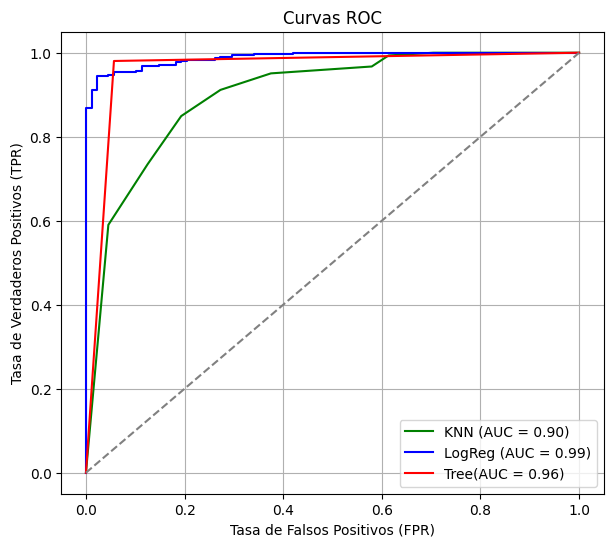

In [20]:
# cálculo de los elementos
# Curva ROC

fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test, modelo_knn.predict_proba(X_test)[:,1])
fpr_test_log, tpr_test_log, _ = roc_curve(y_test, modelo_log.predict_proba(X_test)[:,1])
fpr_test_tree, tpr_test_tree, _ = roc_curve(y_test, modelo_tree.predict_proba(X_test)[:,1])

# AUC
auc_test_knn = roc_auc_score(y_test, modelo_knn.predict_proba(X_test)[:,1])
auc_test_log = roc_auc_score(y_test, modelo_log.predict_proba(X_test)[:,1])
auc_test_tree = roc_auc_score(y_test, modelo_tree.predict_proba(X_test)[:,1])

# Gráfica curva ROC
plt.figure(figsize=(7,6))
plt.plot(fpr_test_knn, tpr_test_knn, color='green', label=f'KNN (AUC = {auc_test_knn:.2f})')
plt.plot(fpr_test_log, tpr_test_log, color='blue', label=f'LogReg (AUC = {auc_test_log:.2f})')
plt.plot(fpr_test_tree, tpr_test_tree, color='red', label=f'Tree(AUC = {auc_test_tree:.2f})')

# Línea diagonal (azar)
plt.plot([0,1], [0,1], color='gray', linestyle='--')

# Detalles del gráfico
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curvas ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# <FONT SIZE=5 COLOR="purple"> 3. Validación Cruzada </FONT>

La **validación cruzada**, o *cross validation*, es una técnica utilizada para evaluar los resultados obtenidos de un modelo de *machine learning* y garantizar que son independientes de los conjuntos de entrenamiento ($X_{train}$) y prueba ($X_{test}$).

- Cuando usamos la función de *sklearn*:

$$train\_test\_split(X, y, random\_state = 123 )$$

se extraen dos muestras aleatorias como conjuntos de entrenamiento y prueba. Luego se hace el proceso de entrenamiento y validación del modelo, teniendo como referencias las muestras seleccionadas. Sin embargo, una pregunta natural es:

**¿Qué sucede si tomo otras muestras como conjunto de entrenamiento y de prueba, obtendré los mismos resultados?**

Para responder lo anterior, debemos seleccionar varias muestras que correspondan a conjunto de entrenamiento y prueba diferentes y hacer el análisis del modelo. Precisamente, esto es lo que hace el proceso de validación cruzada.

Se divide el conjunto de datos en $n$ partes, de las cuales se toma una como conjunto de *prueba* y las otras $n-1$ como conjunto de entrenamiento. Y vamos rotando el conjunto de prueba, tal y como se muestra en la siguiente figura.

<br>

<center><img src="https://github.com/Fabian830348/cursos/blob/master/val_cruzada/validation1.png?raw=true?" alt="centered image" width="600" height="350"></center>

<br>

# <FONT SIZE=5 COLOR="purple"> 4. Búsqueda en Grilla </FONT>

- La ***búsqueda en grilla*** (grid search) es un método que busca las mejores combinaciones de hiperparámetros que hacen que un modelo tenga el error más bajo, es decir, estimaciones más precisas.

- En cada combinación de hiperparámetros, la búsqueda en grilla aplica el proceso de *cross-validation* con el fin de dar una mejor evaluación del modelo en cada punto.

- Cuando hablamos de búsqueda en grilla tenemos algunas alternativas: Grid Search y Random Grid Search. La primera se denomina propiamente *Grid Search* y en este método, se toman todas las combinaciones posibles de los hiperparámetros que se van a revisar. Como se ilustra en la siguiente gráfica.

<br>
<center><img src="https://github.com/Fabian830348/cursos/blob/master/val_cruzada/grid1.png?raw=true?" alt="centered image" width="600" height="350"></center>
<br>

Para hacer la búsqueda en grilla, vamos a considerar los siguientes parámetros

1. El número de vecinos $k$ : [1,20]
2. Las métricas : *euclideana* y *manhattan*
3. Los pesos: "uniformes" o basados en "distancia"

De acuerdo con lo anterior tenemos

$$(20 \, vecinos) \times ( 2 \, metricas) \times ( 2 \, pesos) = 80$$

combinaciones de parámetros.

**Tuning KNN**

In [ ]:
from sklearn.pipeline import Pipeline

# Crear pipeline con escalador y modelo
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

# definimos los parámetros que vamos a combinar. Diccionario
grid_params = {"knn__n_neighbors" : list(range(1, 21)),         # se recorre la lista en k
               "knn__weights" : ["uniform","distance"],         # se establecen los pesos
               "knn__metric" : ["euclidean","manhattan"]}       # se establecen las métricas

# hacemos la búsqueda en grilla con 5-folds
Grid_Search = GridSearchCV(pipe,                                     # el modelo aplicado
                           grid_params,                             # los parámetros que van a variar
                           cv = 10,                                 # el número de folds
                           verbose = 3)                             # para que imprima resultados. Posibilidades: 1,2 o 3
# Entrenar el modelo obtenido arriba
g_res_knn = Grid_Search.fit(X_train,y_train)

Ahora, buscamos el mejor *score*

In [26]:
print("Mejor score: ",g_res_knn.best_score_)

Mejor score:  0.918227424749164


Finalmente, los hiperparámetros que lograron ese *score*

In [27]:
print("Mejores hiperparámetros", g_res_knn.best_params_)

Mejores hiperparámetros {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'distance'}


**Tuning Regresión Logística**

In [28]:
# Crear pipeline con escalador y modelo
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

# Definir los hiperparámetros a probar
grid_params = {
    "logreg__penalty": ["l1", "l2", "elasticnet", None],     # tipo de regularización
    "logreg__C": [0.001, 0.01, 0.1, 1, 10, 100],             # fuerza de regularización (inversa de lambda)
}

# Crear búsqueda en grilla
Grid_Search = GridSearchCV(
    pipe,
    grid_params,
    cv=10,
    verbose=3,
)

# Entrenar el modelo
g_res_logreg = Grid_Search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros:", g_res_logreg.best_params_)
print("Mejor puntuación (CV):", g_res_logreg.best_score_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Mejores parámetros: {'logreg__C': 0.001, 'logreg__penalty': None}
Mejor puntuación (CV): 0.9792522694696608


**Tuning Árboles de Decisión**

In [29]:
# Pipeline (sin escalado; para mantener estructura puedes usar 'passthrough')
pipe = Pipeline([
    ("model", DecisionTreeClassifier(random_state=42))
])

# Hiperparámetros importantes del árbol
grid_params = {
    "model__criterion": ["gini", "entropy", "log_loss"],   # función de impureza
    "model__max_depth": [None, 3, 5, 7, 10, 15, 20],       # control de complejidad
    "model__min_samples_split": [2, 5, 10, 20],            # mínimo para dividir nodo
}

Grid_Search = GridSearchCV(
    pipe,
    grid_params,
    cv=10,
    verbose=3,
    n_jobs=-1
)

g_res_tree = Grid_Search.fit(X_train, y_train)

print("Mejores parámetros:", g_res_tree.best_params_)
print("Mejor puntuación (CV):", g_res_tree.best_score_)

Fitting 10 folds for each of 84 candidates, totalling 840 fits
Mejores parámetros: {'model__criterion': 'entropy', 'model__max_depth': 3, 'model__min_samples_split': 2}
Mejor puntuación (CV): 0.9847109412326803
